<a href="https://colab.research.google.com/github/saiuttamgadde/Malaria_defect_prediction/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

In [3]:
import tensorflow as tf
print(tf.__version__)

2.6.0


Resize all the images and define train and test path

In [4]:
img_size = [224,224]

train_path = '/content/drive/MyDrive/Dataset/Train'
valid_path = '/content/drive/MyDrive/Dataset/Test'

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Import VGG19 library and add preprocessing layer. [3] is RGB channels and use imagenet weights

In [12]:
model = VGG19(input_shape=img_size + [3], weights='imagenet', include_top=False)

Imagenet is trained on millions of classes and don't train all the layers

In [13]:
for layer in model.layers:
    layer.trainable = False

In [14]:
folders = glob('/content/drive/MyDrive/Dataset/Train/*')

In [15]:
folders

['/content/drive/MyDrive/Dataset/Train/Parasite',
 '/content/drive/MyDrive/Dataset/Train/Uninfected']

In [16]:
x=Flatten()(model.output)

softmax as output contains two nodes

In [18]:
prediction=Dense(len(folders),activation='softmax')(x)

final_model = Model(inputs=model.input,outputs=prediction)

In [20]:
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Define model cost and optimization method and as the output contains two nodes, not one use categorical cross entropy

In [30]:
final_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

generate more train data usig image data generator and only rescale the image pixels ranging from 0 to 255 to 0 to 1

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

provide same target size as initiated for image size

In [32]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [33]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


Fit the model

In [38]:
r = final_model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
13/13 [==============================] - 8s 617ms/step - loss: 0.2092 - accuracy: 0.9183 - val_loss: 0.3327 - val_accuracy: 0.8582
Epoch 2/20
13/13 [==============================] - 8s 614ms/step - loss: 0.1581 - accuracy: 0.9447 - val_loss: 0.3232 - val_accuracy: 0.8582
Epoch 3/20
13/13 [==============================] - 8s 602ms/step - loss: 0.1880 - accuracy: 0.9207 - val_loss: 0.2535 - val_accuracy: 0.8881
Epoch 4/20
13/13 [==============================] - 8s 607ms/step - loss: 0.2434 - accuracy: 0.8990 - val_loss: 0.2368 - val_accuracy: 0.9254
Epoch 5/20
13/13 [==============================] - 8s 603ms/step - loss: 0.1427 - accuracy: 0.9591 - val_loss: 0.3282 - val_accuracy: 0.8358
Epoch 6/20
13/13 [==============================] - 8s 597ms/step - loss: 0.1454 - accuracy: 0.9447 - val_loss: 0.2126 - val_accuracy: 0.9328
Epoch 7/20
13/13 [==============================] - 8s 596ms/step - loss: 0.1582 - accuracy: 0.9327 - val_loss: 0.2536 - val_accuracy: 0.9104
Epoch 

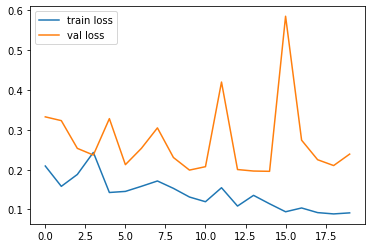

<Figure size 432x288 with 0 Axes>

In [39]:
#plot loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


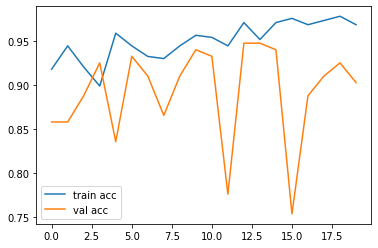

<Figure size 432x288 with 0 Axes>

In [40]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [41]:
#save the model

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')
